In [50]:
pip install version-information

Note: you may need to restart the kernel to use updated packages.


In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%load_ext version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


In [52]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
        'LSTAT','TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, 
                     index_col=False)

# Explorative Datenanalyse des Boston Housing Datensatztes

### a) Führen Sie für diesen Datensatz eine explorative Analyse wie in der Vorlesung gezeigt mithilfe eines IPython-Notebooks und den Paketen Pandas und Numpy durch. 

Zu beantwortende Fragen:
- Welche der Variablen sind kategorisch?
- Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises und warum?

  - Die vermutlich beste Variable zur Vorhersage ist RM(Raum Anzahl) je mehr Räume ein Haus desto teurer ist es.
  - Vielleicht NOX / DIS da sich aus diesen Variablen die Entfernung zu Stadtzentren ableiten lässt. Je ländlicher die Gegend desto billiger werden
    Häuser vorallem im Bezug auf hohe Raumanzahl.

  
- Welche dieser Variablen sind miteinander korreliert?
- Welche sind daher Kandidaten, die man evtl. weglassen könnte?

In [53]:
boston.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Erklärung spalten "Boston Housing" 

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per house

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

TGT - Hauspreis



In [54]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [55]:
boston.info()
#--> Keine Null Einträge

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TGT      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [56]:
boston.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TGT        False
dtype: bool

In [57]:
boston.duplicated().any()
#DataFrame.drop_duplicates()

np.False_

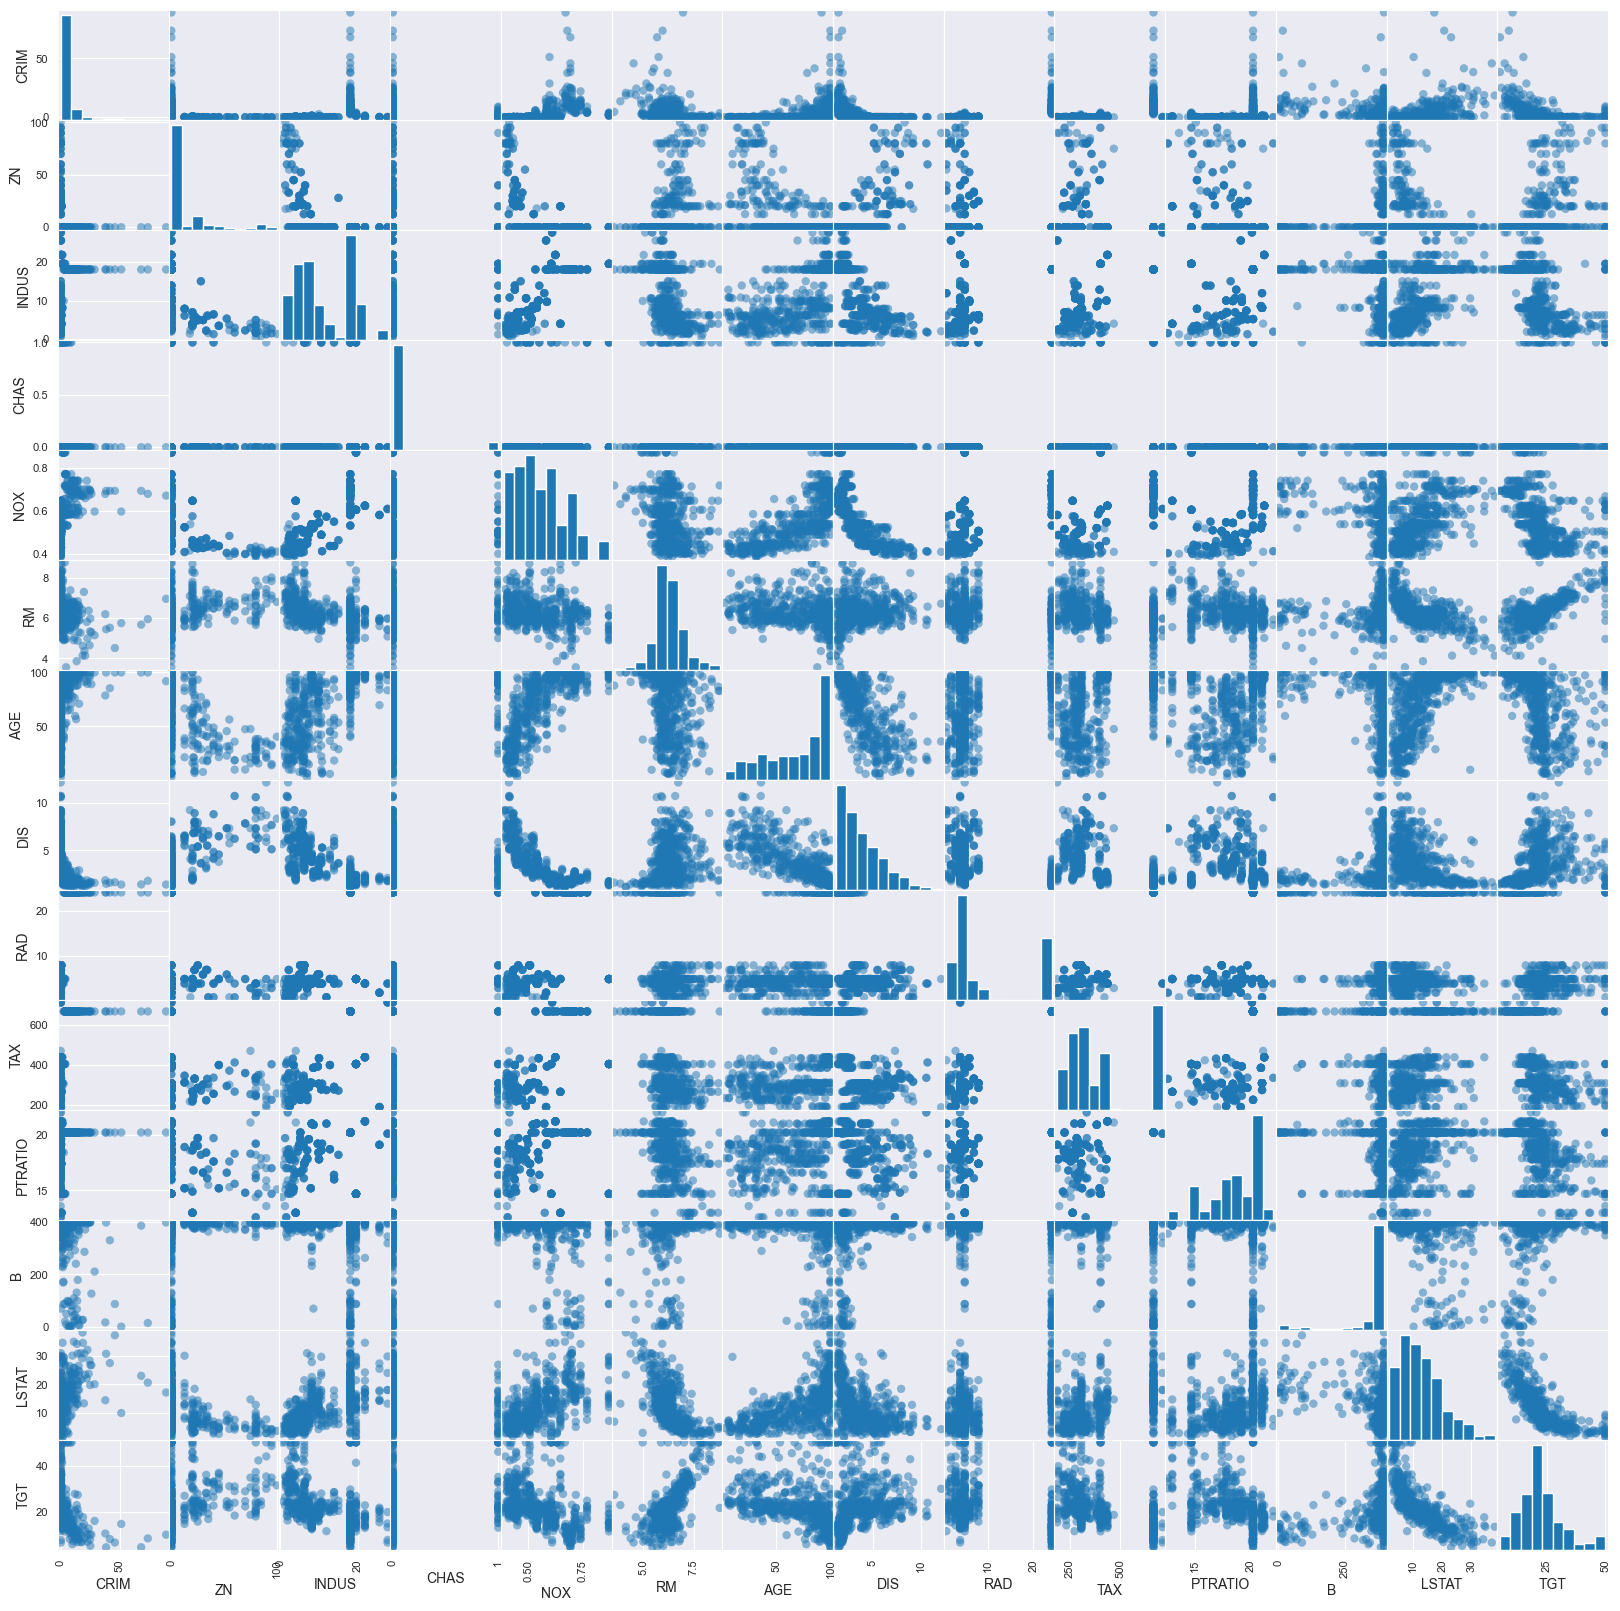

In [58]:
pd.plotting.scatter_matrix(boston, figsize=(20,20), marker='o')
plt.show()

### b) Beantworten Sie anhand der Darstellung der Streumatrix folgende Fragen:

#### Welche der Variablen sind kategorisch? 
Kategorische Variablen im Boston Housing Datensatz sind:
- CHAS {1,0}, auch im Scatterplot zu sehen
- RAD {1, ..., 24} Index der nur ints annehmen kann (Erreichbarkeit der Highways).

Die aufgezählten Indizes sind außerdem vom Typ int, alle anderen floats, was ebenfalls ein starkes Indiz ist

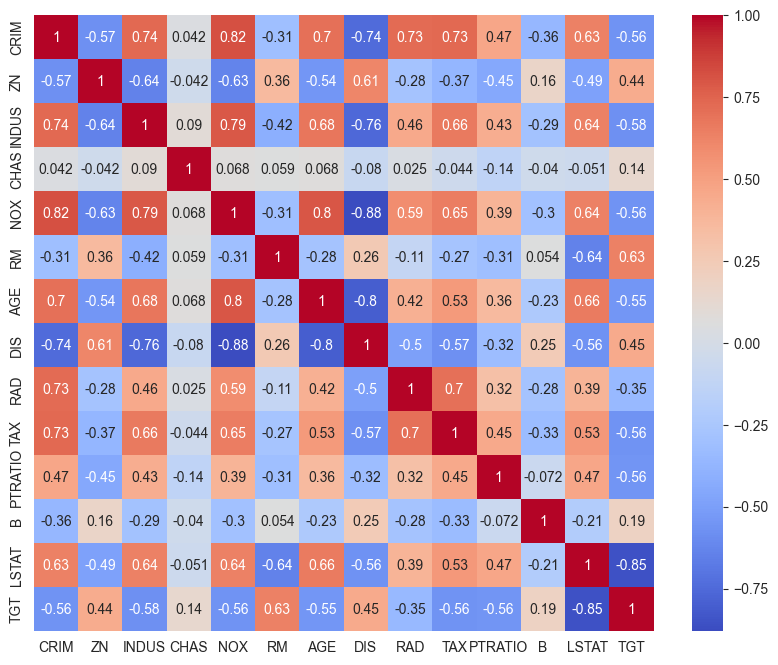

In [59]:
corr_matrix = boston.corr(method = "spearman")
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

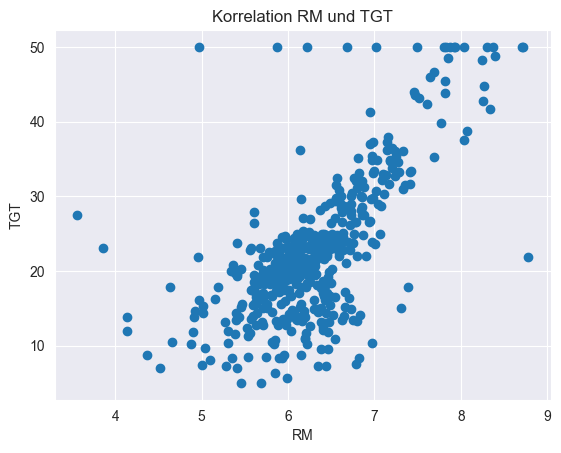

In [60]:
plt.scatter(boston["RM"], boston["TGT"])

plt.title("Korrelation RM und TGT")
plt.xlabel("RM")
plt.ylabel("TGT")


#RM hat eine positive Korrelation mit TGT(Hauspreis), das bedeutet je mehr Räume ein Haus besitzt desto höher ist in der Regel der Hauspreis.

plt.show()

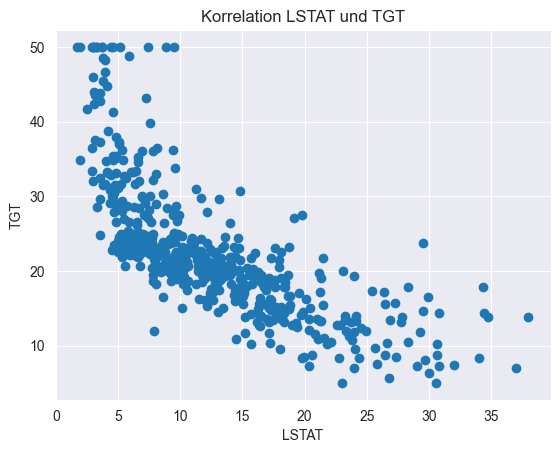

In [61]:
plt.scatter(boston["LSTAT"], boston["TGT"])

#Positive Korrelation zwischen LSTAT und TGT, das bedeutet je niedriger der Anteil der %lower Bevölkerung desto niedriger die Hauspreise. 

plt.title("Korrelation LSTAT und TGT")
plt.xlabel("LSTAT")
plt.ylabel("TGT")

plt.show()

 #### Welche sind daher Kandidaten, die man evtl. weglassen könnte? (Beantwortung bitte als Markup in Notebook eintragen)
 Weggelassen werden können im Bezug auf die Problemstellung Dimensionen die eine sehr niedrige betragsmäßige Korrelation mit TGT haben. Bspw. B (0.19) RAD (-0.35), CHAS (0.14)
 

 
 

#### Welche dieser Variablen sind miteinander korreliert?
Aus Korrelationsmatrix
|corr| = 1: starke Korrelation
|corr| = 0: keine Korrelation

NOX corr AGE (0.8),
NOX corr DIS (0.88),DIS corr INDUS (0.76)

TGT corr LSTAT (-0.85) 

TGT corr RM (0.63)

#### Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises und warum?
Generell Variablen mit einer hohen Korrelation.

- (% lower status of the population, in etwa Bildungsgrad der Bevölkerung) 

    TGT corr LSTAT (-0.85) 
     
- RM (average number of rooms per dwelling)

    TGT corr RM (0.63)

In [62]:
pip install version-information

In [63]:
%version_information numpy,pandas

Software versions
Python 3.12.7 64bit [MSC v.1941 64 bit (AMD64)]
IPython 8.28.0
OS Windows 11 10.0.22631 SP0
numpy 2.1.2
pandas 2.2.3
Wed Oct 16 22:08:34 2024 Mitteleuropäische Sommerzeit